<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [177]:
# Check for GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [178]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

2.0.1


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

- Healthcare
- Autonomous Driving
- Robotics

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning is where the accuracy of the model is artificially inflated due to finding patterns in the data that do not actually exist. For example, instead of drawing a line of best fit, the model joins up the dots using an nth order polynomial, which is not representative of how the data is actually spread.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Regularisation: this is the method we use when we are unable to remove features of the input dataset, so penalties are applied to the input parameters with larger coefficients, limiting the model's variance - a large variance causes overfitting.
- Early stopping - limiting how many epochs the model trains for, so as to prevent it learning the noise and random fluctuations in the data. We need to strike a balance here, because it can lead to underfitting instead.
- Adding dropout layers - probabilistically dropping out nodes in a NN reduces complexity, and if the performance remains the same, this is exactly what we should do. As a thumb rule, we should aim to produce neural networks with the lowest complexity but maintaining performance.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [179]:
import torch
import torch.nn as nn
import torchvision
import torch.utils

from torchvision import transforms
from torchvision import datasets

import matplotlib.pyplot as plt
import tqdm

In [180]:
# Importing datasets for testing and training

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None,
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None,
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]


Text(0.5, 1.0, '5')

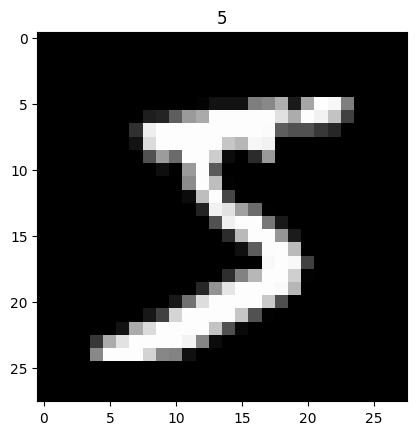

In [181]:
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [color_channels, height, width]")

plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)

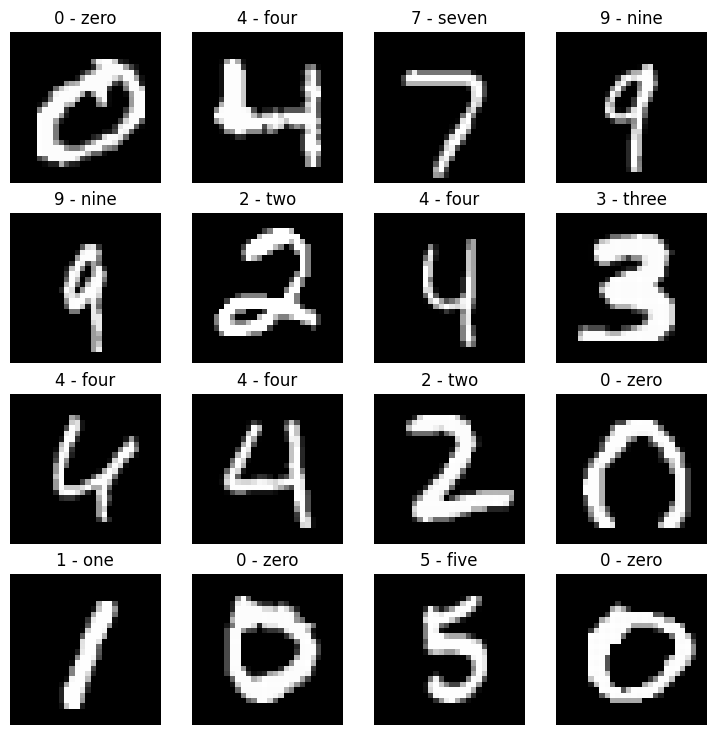

In [182]:
class_names = train_data.classes

fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [183]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=32,
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_data,
                                              batch_size=32,
                                              shuffle=True)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [184]:
class mymodel(nn.Module):

    def __init__(self, input_shape: int, output_shape: int, hidden_layers: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                      in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,
                         stride=1,
                         padding=1
                         )
        )

        self.conv_block_2 = nn.Sequential(
                      nn.Conv2d(
                      in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        x = self.classifier(x)

        return x

In [185]:
image.shape

torch.Size([1, 28, 28])

In [186]:
model_2 = mymodel(input_shape=1,
                              hidden_layers=10,
                              output_shape=len(class_names)).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [187]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(lr=0.01,
                            params=model_2.parameters())

acc_metric = Accuracy(task="multiclass", num_classes=len(class_names))

In [188]:
# Code to time how quickly our model runs

from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time"""
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [189]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: optimizer,
               acc_metric: acc_metric):
    train_acc, train_loss = 0, 0

    model.train()

    for batch, (X,y) in enumerate(data_loader):
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += acc_metric(y_pred, y) * 100

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

In [190]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_metric):
    test_loss, test_acc = 0, 0
    
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            
            loss = loss_fn(y_pred, y)
            test_loss += loss
            test_acc += acc_metric(y_pred, y) * 100
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        test_acc = test_acc.item()

    print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


                

In [191]:
# Import tqdm for progress bar

from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(model=model_2,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                acc_metric=acc_metric)
    
train_time_end = timer()

total_train_time = print_train_time(start=train_start_time,
                                    end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
torch.Size([32, 10, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1960 and 490x10)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?